In [1]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()

In [4]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [5]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [10]:
import pandas as pd
df = pd.DataFrame(dataset.data, columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [11]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
# independent and dependent features
x = df
y = dataset.target

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
## correlation
x_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.182548,0.205760,0.375235,0.292377,0.256674,-0.102400,0.238274,0.284495,0.313088
sex,0.182548,1.000000,0.099155,0.254949,0.048496,0.144873,-0.357021,0.311271,0.148839,0.225502
bmi,0.205760,0.099155,1.000000,0.408617,0.263397,0.274833,-0.386691,0.424186,0.454696,0.386804
bp,0.375235,0.254949,0.408617,1.000000,0.260946,0.197409,-0.210952,0.282845,0.415112,0.400120
s1,0.292377,0.048496,0.263397,0.260946,1.000000,0.889398,0.013789,0.555234,0.526625,0.344607
s2,0.256674,0.144873,0.274833,0.197409,0.889398,1.000000,-0.223301,0.657284,0.308196,0.302232
s3,-0.102400,-0.357021,-0.386691,-0.210952,0.013789,-0.223301,1.000000,-0.754259,-0.412928,-0.301337
s4,0.238274,0.311271,0.424186,0.282845,0.555234,0.657284,-0.754259,1.000000,0.625295,0.441797
s5,0.284495,0.148839,0.454696,0.415112,0.526625,0.308196,-0.412928,0.625295,1.000000,0.485497
s6,0.313088,0.225502,0.386804,0.400120,0.344607,0.302232,-0.301337,0.441797,0.485497,1.000000


<Axes: >

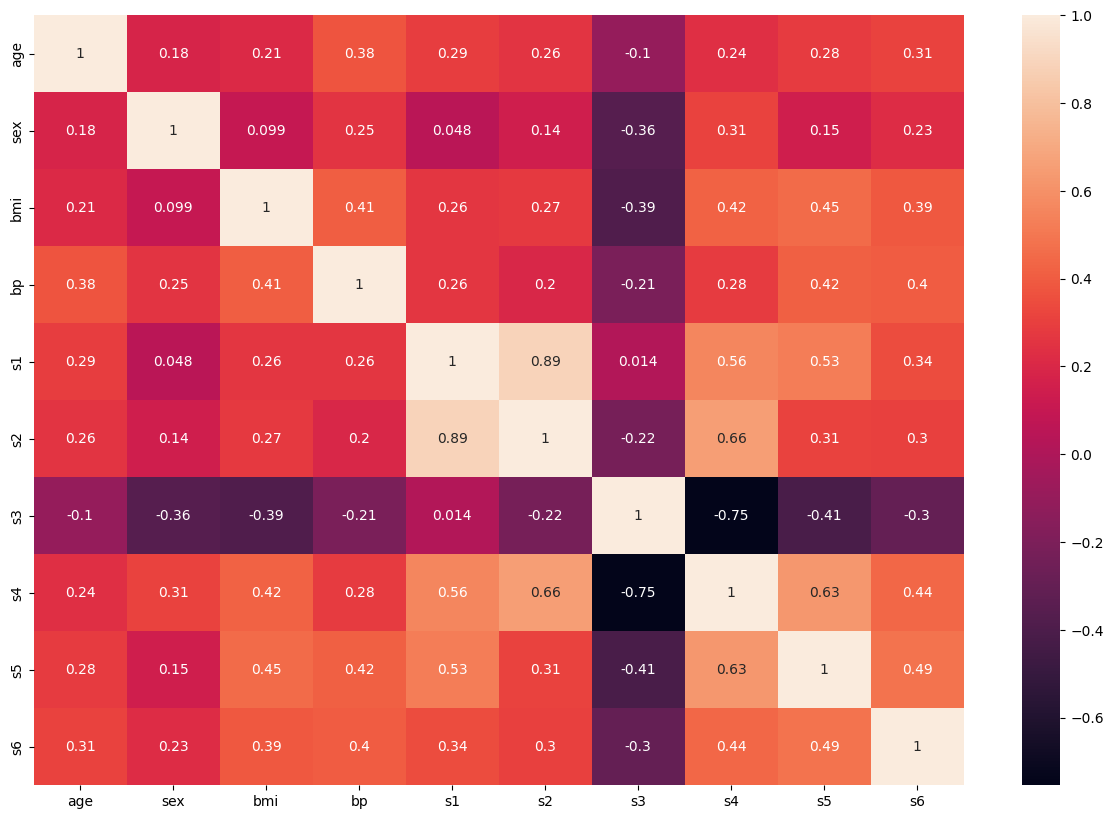

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,10))
sns.heatmap(x_train.corr(), annot=True)

In [16]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

### Hyperparameter Tuning

In [17]:
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 14],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50, 100],
    'random_state': [0]
}

In [20]:
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()
grid = GridSearchCV(regressor, param_grid=params, cv=5, scoring='neg_mean_squared_error')

In [21]:
import warnings
warnings.filterwarnings('ignore')

grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 2, 4, 6, 8, 10, 12, 14],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 50, 100],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 20],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
                         'random_state': [0], 'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [22]:
grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.1,
 'random_state': 0,
 'splitter': 'best'}

In [23]:
y_pred = grid.predict(x_test)

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("MAE",mean_absolute_error(y_test, y_pred))
print("MSE",mean_squared_error(y_test, y_pred))
print("R2",r2_score(y_test, y_pred))

MAE 53.58988764044944
MSE 4812.935393258427
R2 0.061426700175364335


In [25]:
regressor = DecisionTreeRegressor(
    criterion='absolute_error',
    max_depth=None,
    max_features=None,
    max_leaf_nodes=None,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,  
    random_state=0,
    splitter='best'
)


regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', random_state=0)

[Text(0.5958362573281002, 0.9782608695652174, 'x[8] <= 0.022\nabsolute_error = 66.567\nsamples = 353\nvalue = 139.0'),
 Text(0.3645535758644674, 0.9347826086956522, 'x[2] <= 0.005\nabsolute_error = 50.538\nsamples = 240\nvalue = 101.5'),
 Text(0.48019491659628377, 0.9565217391304348, 'True  '),
 Text(0.15845929799284578, 0.8913043478260869, 'x[8] <= -0.043\nabsolute_error = 38.455\nsamples = 178\nvalue = 90.0'),
 Text(0.06667329093799682, 0.8478260869565217, 'x[0] <= -0.095\nabsolute_error = 28.463\nsamples = 54\nvalue = 72.0'),
 Text(0.01589825119236884, 0.8043478260869565, 'x[0] <= -0.098\nabsolute_error = 42.167\nsamples = 6\nvalue = 123.5'),
 Text(0.009538950715421303, 0.7608695652173914, 'x[4] <= -0.036\nabsolute_error = 19.333\nsamples = 3\nvalue = 71.0'),
 Text(0.006359300476947536, 0.717391304347826, 'x[6] <= -0.001\nabsolute_error = 8.0\nsamples = 2\nvalue = 63.0'),
 Text(0.003179650238473768, 0.6739130434782609, 'absolute_error = 0.0\nsamples = 1\nvalue = 71.0'),
 Text(0.0095

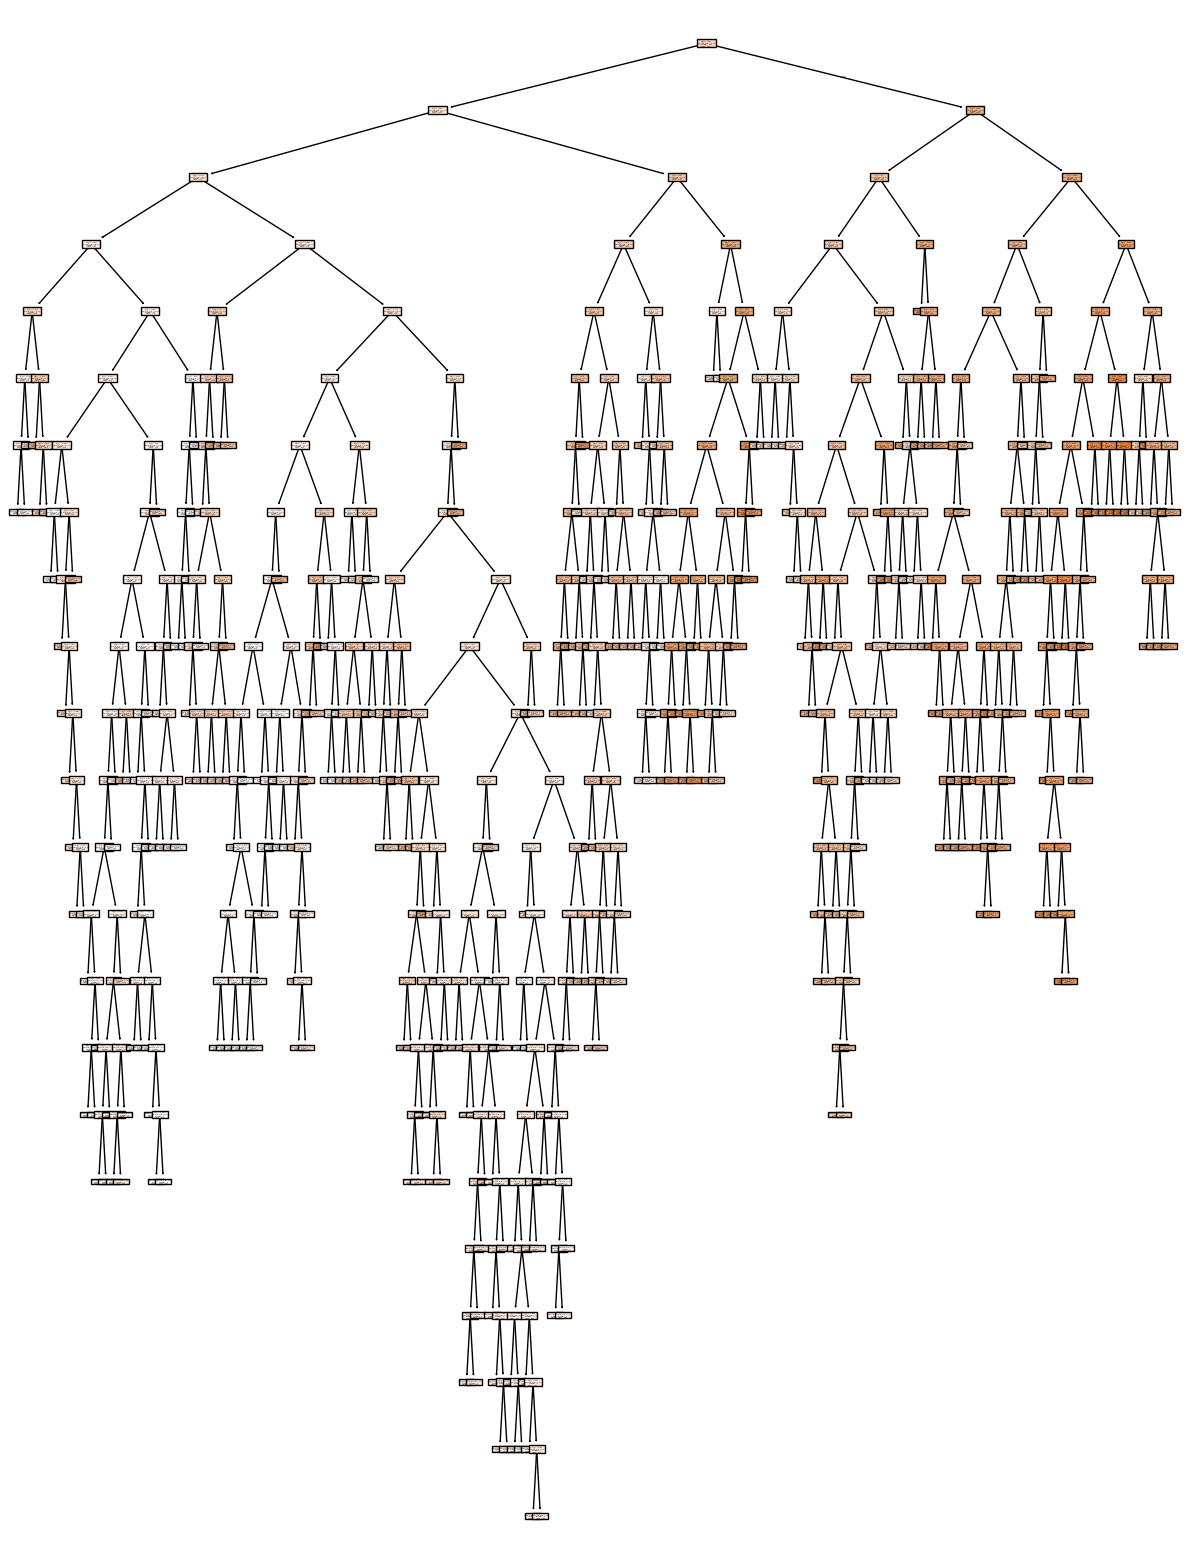

In [26]:
# Visulaization

from sklearn import tree
plt.figure(figsize=(15,20))
tree.plot_tree(regressor, filled=True)